## Measuring Market Power in the Smartphone Industry

### Setting Working Directory and loading dataset

In [1]:
#
import os
#os.chdir('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement')

#import kaggle 

#from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize and authenticate the API
#api = KaggleApi()
#api.authenticate()

# Downloading dataset providing mobile manufacturer, characteristics launching p
#api.dataset_download_files('abdulmalik1518/mobiles-dataset-2025', path='0_Data', unzip=True)

import pandas as pd

phone_features = pd.read_csv('Mobiles Dataset (2025).csv', encoding= 'latin1')

# Collecting market share 2014-2023 for US, CN, India
share_us = pd.read_csv('vendor-US-monthly-201401-202312.csv', encoding='latin1')
share_cn = pd.read_csv('vendor-CN-monthly-201401-202312.csv', encoding='latin1')
share_in = pd.read_csv('vendor-IN-monthly-201401-202312.csv', encoding='latin1')
share_ww = pd.read_csv('vendor-ww-monthly-201401-202312.csv', encoding='latin1')



FileNotFoundError: [Errno 2] No such file or directory: 'Mobiles Dataset (2025).csv'

In [ ]:
share_ww.head(5)

,Date,Samsung,Apple,Unknown,Xiaomi,Huawei,Nokia,Oppo,LG,Motorola,...,Pantech,Avea,Karbonn,dtac,Yu,Sharp,Symphony,Lanix,T-Mobile,Other
0,2014-01,27.85,23.52,13.56,0.07,0.95,18.42,0.00,2.99,0.89,...,0.16,0.00,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.09
1,2014-02,30.40,22.94,11.43,0.08,0.98,17.27,0.02,3.07,1.10,...,0.14,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.08
2,2014-03,30.57,23.57,10.85,0.06,1.03,16.37,0.04,3.14,1.39,...,0.12,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.01,0.10
3,2014-04,31.59,23.21,10.51,0.08,1.10,15.61,0.05,3.16,1.44,...,0.10,0.02,0.0,0.0,0.0,0.00,0.0,0.0,0.01,0.12
4,2014-05,32.79,23.21,10.30,0.08,1.17,14.44,0.05,3.38,1.76,...,0.09,0.02,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.12


### Data Wrangling (mobile dataset + market share)

In [ ]:
#Droping price from other Pakistan in case we can't find data
#df.drop('Launched Price (Pakistan)', axis=1, inplace=True)

phone_features['Company Name'].unique()
# changing column name to Year
phone_features.rename(columns={'Launched Year': 'Year'}, inplace=True)


#converting format for data to year
#share_us['Date'] = pd.to_datetime(share_us['Date'].astype(str), format='%Y-%m', errors='coerce').dt.year
#share_CN['Date'] = pd.to_datetime(share_CN['Date'].astype(str), format='%Y-%m', errors='coerce').dt.year
#share_IN['Date'] = pd.to_datetime(share_IN['Date'].astype(str), format='%Y-%m', errors='coerce').dt.year
share_ww['Date'] = pd.to_datetime(share_ww['Date'].astype(str), format='%Y-%m', errors='coerce').dt.year

# Pivoting marketshare of each firm for 

#share_us = share_us.melt(id_vars='Date', var_name='Company Name', value_name='Market Share US')
#share_CN = share_CN.melt(id_vars='Date', var_name='Company Name', value_name='Market Share CN')
#share_IN = share_IN.melt(id_vars='Date', var_name='Company Name', value_name='Market Share IN')
share_ww = share_ww.melt(id_vars='Date', var_name='Company Name', value_name='Market Share')



# grouping by year and firm
#share_us = share_us.groupby(['Date', 'Company Name'], as_index=False)['Market Share US'].mean()
#Share_cn = share_CN.groupby(['Date', 'Company Name'], as_index=False)['Market Share'].sum()
#share_in = share_IN.groupby(['Date', 'Company Name'], as_index=False)['Market Share'].sum()
share_ww = share_ww.groupby(['Date', 'Company Name'], as_index=False)['Market Share'].mean()

share_ww.rename(columns= {'Date' : 'Year'}, inplace=True)



share_ww.head(5)

,Year,Company Name,Market Share
0,2014,AIS,0.000000
1,2014,Acer,0.085000
2,2014,Alcatel,0.502500
3,2014,Apple,23.860833
4,2014,Archos,0.030000


### Collecting data bout top 10 selling phones and adding missing phones in the dataset

In [ ]:
import pandas as pd
import numpy as np
#Collecting data about each model and its market share per year
global_share_by_model = pd.read_csv('Cleaned_Top_Smartphone_Models__2021-2023_.csv', encoding='latin1')
global_share_by_model.rename(columns= {'Model' : 'Model Name'}, inplace=True)
global_share_by_model
# adding missng phones
# 1. Extract the two sets of names
share_models = set(global_share_by_model['Model Name'])
phone_models = set(phone_features['Model Name'])

# 2. Models in the share list but not in your phones
missing_in_phone = share_models - phone_models

# 3. Models in your phones but not in the share list
missing_in_global = phone_models - share_models


# 1) Define the missing models (including correct Launched Price)
missing_data = [
    {"Company Name": "Xiaomi",            "Model Name": "Redmi 9A",     "Mobile Weight": "194", "RAM": "2/3/4 GB", "Front Camera": "5 MP", "Back Camera": "13 MP",       "Processor": "MediaTek Helio G25",     "Battery Capacity": "5000 mAh", "Screen Size": "6.53 in", "Launched Price (USA)": "US$99.99",  "Year": 2020},
    {"Company Name": "Xiaomi",            "Model Name": "Redmi 9",      "Mobile Weight": "198 ", "RAM": "3/4 GB",   "Front Camera": "8 MP", "Back Camera": "13+8+5+2 MP","Processor": "MediaTek Helio G80",     "Battery Capacity": "5000 mAh", "Screen Size": "6.53 in", "Launched Price (USA)": "US$149",    "Year": 2020},
    {"Company Name": "Samsung","Model Name": "Galaxy A03",    "Mobile Weight": "196 g", "RAM": "3 GB",     "Front Camera": "5 MP", "Back Camera": "48+2 MP",   "Processor": "Unisoc T606",            "Battery Capacity": "5000 mAh", "Screen Size": "6.5 in",  "Launched Price (USA)": "US$109.99","Year": 2021},
    {"Company Name": "Samsung","Model Name": "Galaxy A04e",   "Mobile Weight": "188 g", "RAM": "3 GB",   "Front Camera": "5 MP", "Back Camera": "13+2 MP",   "Processor": "MediaTek Helio P35",     "Battery Capacity": "5000 mAh", "Screen Size": "6.5 in",  "Launched Price (USA)": "US$119.99","Year": 2022},
    {"Company Name": "Samsung","Model Name": "Galaxy A12",    "Mobile Weight": "205 g", "RAM": "4 GB", "Front Camera": "8 MP", "Back Camera": "48+5+2+2 MP","Processor": "MediaTek Helio P35",     "Battery Capacity": "5000 mAh", "Screen Size": "6.5 in",  "Launched Price (USA)": "US$179.99","Year": 2020},
    {"Company Name": "Samsung","Model Name": "Galaxy A13",    "Mobile Weight": "195 g", "RAM": "6 GB", "Front Camera": "8 MP", "Back Camera": "50+5+2+2 MP","Processor": "Dimensity 700 5G",      "Battery Capacity": "5000 mAh", "Screen Size": "6.6 in",  "Launched Price (USA)": "US$189.99","Year": 2022},
    {"Company Name": "Samsung","Model Name": "Galaxy A14 4G", "Mobile Weight": "201 g", "RAM": "6 GB",   "Front Camera": "13 MP","Back Camera": "50+5+2 MP",   "Processor": "Helio G80 / Exynos 850", "Battery Capacity": "5000 mAh", "Screen Size": "6.6 in",  "Launched Price (USA)": "US$199.99","Year": 2023},
    {"Company Name": "Samsung","Model Name": "Galaxy A14 5G","Mobile Weight": "202 g", "RAM": "6 GB", "Front Camera": "13 MP","Back Camera": "50+2+2 MP",   "Processor": "Dimensity 700 / Exynos 1330","Battery Capacity": "5000 mAh", "Screen Size": "6.6 in","Launched Price (USA)": "US$249.99","Year": 2023},
    {"Company Name": "Apple",         "Model Name": "iPhone SE 2020", "Mobile Weight": "148 g", "RAM": "3 GB",     "Front Camera": "7 MP", "Back Camera": "12 MP",      "Processor": "Apple A13 Bionic",       "Battery Capacity": "1821 mAh",  "Screen Size": "4.7 in",  "Launched Price (USA)": "US$399",   "Year": 2020},
    {"Company Name": "Apple",         "Model Name": "iPhone SE 2022", "Mobile Weight": "144 g", "RAM": "4 GB",     "Front Camera": "7 MP", "Back Camera": "12 MP",      "Processor": "Apple A15 Bionic",       "Battery Capacity": "2018 mAh",  "Screen Size": "4.7 in",  "Launched Price (USA)": "US$429",   "Year": 2022}
]


# 2) Build a DataFrame from that list
missing_df = pd.DataFrame(missing_data)

# 3) Append to your existing phone_features DataFrame
phone_features = pd.concat([phone_features, missing_df], ignore_index=True, sort=False)

phone_features.columns

Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Year'],
      dtype='object')

In [ ]:
#updating columns containing numeric values seperated with int
import pandas as pd
import re


import pandas as pd
import numpy as np
import re
def extract_screen_inches(size_str):
    """
    From strings like "6.7 inch", "6.72.7", "7\"", etc.,
    return the first valid float found, else NaN.
    """
    if pd.isna(size_str):
        return np.nan
    # find all runs of digits with optional decimal
    nums = re.findall(r'(\d+(?:\.\d+)?)', str(size_str))
    return float(nums[0]) if nums else np.nan

# 2. Apply it
phone_features['Screen Size (inches)'] = phone_features['Screen Size'].apply(extract_screen_inches)


# 1. Helper to extract MP values from a string
def extract_mp_values(camera_str):
    cleaned = re.sub(r"4K|1080p|720p|\(.*?\)", "", str(camera_str), flags=re.IGNORECASE)
    matches = re.findall(r"(\d+)\s*MP", cleaned.upper())
    return [int(m) for m in matches] if matches else []

# 2. Helper to extract video resolution after a slash
def extract_video_resolution(camera_str):
    if pd.isna(camera_str):
        return np.nan
    parts = str(camera_str).split('/')
    if len(parts) > 1:
        res = parts[1].strip().upper()
        return res if re.match(r'^(4K|1080P|720P)$', res) else np.nan
    return np.nan

# 3. Photo-MP extraction
phone_features['Front Camera (MP)'] = (
    phone_features['Front Camera']
      .apply(lambda x: extract_mp_values(x)[0] if extract_mp_values(x) else 0)
)
phone_features['Back Camera (Main MP)'] = (
    phone_features['Back Camera']
      .apply(lambda x: extract_mp_values(x)[0] if extract_mp_values(x) else 0)
)
phone_features['Back Camera (Secondary MP)'] = (
    phone_features['Back Camera']
      .apply(lambda x: extract_mp_values(x)[1] if len(extract_mp_values(x)) > 1 else 0)
)

# 4. Video-res extraction
phone_features['Front Camera Video'] = phone_features['Front Camera'].apply(extract_video_resolution)
phone_features['Back Camera Video']  = phone_features['Back Camera'].apply(extract_video_resolution)

# 5. 4K dummy variables
phone_features['Front Camera 4K'] = (phone_features['Front Camera Video'] == '4K').astype(int)
phone_features['Back Camera 4K']  = (phone_features['Back Camera Video']  == '4K').astype(int)

# 6. Drop front-camera 4K if it’s always zero
if phone_features['Front Camera 4K'].sum() == 0:
    phone_features.drop(columns=['Front Camera Video','Front Camera 4K'], inplace=True)

#show data for Apple
apple = phone_features[phone_features['Company Name'] == "Apple"]
apple.columns


Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Year', 'Screen Size (inches)',
       'Front Camera (MP)', 'Back Camera (Main MP)',
       'Back Camera (Secondary MP)', 'Front Camera Video', 'Back Camera Video',
       'Front Camera 4K', 'Back Camera 4K'],
      dtype='object')

In [ ]:
# merging marketshare with phone_featueres as df
df = phone_features.merge(share_ww, on= ['Company Name', 'Year'], how='inner')


In [ ]:
#removing comapnies with less thna 1 % market share
df = df[df['Market Share'] > 1]
df.head(5)

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),...,Year,Screen Size (inches),Front Camera (MP),Back Camera (Main MP),Back Camera (Secondary MP),Front Camera Video,Back Camera Video,Front Camera 4K,Back Camera 4K,Market Share
0,Apple,iPhone 15 128GB,171g,6GB,12MP,48MP,A16 Bionic,"3,200mAh",6.1 inches,"PKR 204,999",...,2023,6.1,12,48,0,NaN,NaN,0,0,28.973333
1,Apple,iPhone 15 256GB,171g,6GB,12MP,48MP,A16 Bionic,"3,200mAh",6.1 inches,"PKR 214,999",...,2023,6.1,12,48,0,NaN,NaN,0,0,28.973333
2,Apple,iPhone 15 512GB,171g,6GB,12MP,48MP,A16 Bionic,"3,200mAh",6.1 inches,"PKR 224,999",...,2023,6.1,12,48,0,NaN,NaN,0,0,28.973333
3,Apple,iPhone 15 Plus 128GB,203g,6GB,12MP,48MP,A16 Bionic,"4,300mAh",6.7 inches,"PKR 234,999",...,2023,6.7,12,48,0,NaN,NaN,0,0,28.973333
4,Apple,iPhone 15 Plus 256GB,203g,6GB,12MP,48MP,A16 Bionic,"4,300mAh",6.7 inches,"PKR 244,999",...,2023,6.7,12,48,0,NaN,NaN,0,0,28.973333


### Adjusting the dataset of phone features so it is aggreated as each year's model per brand

In [ ]:



# 1. Mobile Weight → Mobile Weight (grams)
phone_features['Mobile Weight (grams)'] = pd.to_numeric(
    phone_features['Mobile Weight']
      .str.replace(r'\D', '', regex=True),
    errors='coerce'
)

# 2. Battery Capacity → Battery Capacity (mAh)
phone_features['Battery Capacity (mAh)'] = pd.to_numeric(
    phone_features['Battery Capacity']
      .str.replace(r'\D', '', regex=True),
    errors='coerce'
).astype('Int64')

# 3. RAM → RAM (GB)
ram_digits = (
    phone_features['RAM']
      .str.replace('TB', '000', regex=False)
      .str.extract(r'(\d+)', expand=False)
)
phone_features['RAM (GB)'] = pd.to_numeric(ram_digits, errors='coerce')

# 4. Screen Size → Screen Size (inches)
phone_features['Screen Size (inches)'] = (
    phone_features['Screen Size']
      .astype(str)
      .str.findall(r'\d+(?:\.\d+)?')
      .apply(lambda nums: nums[-1] if nums else np.nan)
      .astype(float)
)

# (Optional) Drop the raw columns
# phone_features.drop(
#     columns=['Mobile Weight','Battery Capacity','RAM','Screen Size'],
#     inplace=True
# )


In [ ]:

phone_features.drop(columns= {'Front Camera Video', 'Back Camera Video', "Mobile Weight",	"RAM",	"Front Camera",	"Back Camera", "Battery Capacity",	"Screen Size" }, inplace=True)


In [ ]:

# Ensure your Model Name column is string type, then remove digits+GB and trim whitespace
df['Model Name'] = (
    df['Model Name']
      .astype(str)
      .str.replace(r'\s*\d+GB', '', regex=True)
      .str.strip()
)
df.columns


Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Year', 'Screen Size (inches)',
       'Front Camera (MP)', 'Back Camera (Main MP)',
       'Back Camera (Secondary MP)', 'Front Camera Video', 'Back Camera Video',
       'Front Camera 4K', 'Back Camera 4K', 'Market Share'],
      dtype='object')

In [ ]:
# Dropping unecessary columns to avoid NAs in the data
df.drop(columns= {'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Battery Capacity', 'Screen Size', 'Launched Price (Pakistan)',
       'Launched Price (India)', 'Launched Price (China)','Launched Price (Dubai)'}, inplace=True)

In [ ]:
df['Front Camera Video'].fillna(0, inplace=True)
df['Back Camera Video'].fillna(0, inplace=True)
df.head(5)

C:\Users\Lfran\AppData\Local\Temp\ipykernel_5992\1927679010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Front Camera Video'].fillna(0, inplace=True)
C:\Users\Lfran\AppData\Local\Temp\ipykernel_5992\1927679010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

,Company Name,Model Name,Processor,Launched Price (USA),Year,Screen Size (inches),Front Camera (MP),Back Camera (Main MP),Back Camera (Secondary MP),Front Camera Video,Back Camera Video,Front Camera 4K,Back Camera 4K,Market Share
0,Apple,iPhone 15,A16 Bionic,USD 799,2023,6.1,12,48,0,0,0.0,0,0,28.973333
1,Apple,iPhone 15,A16 Bionic,USD 849,2023,6.1,12,48,0,0,0.0,0,0,28.973333
2,Apple,iPhone 15,A16 Bionic,USD 949,2023,6.1,12,48,0,0,0.0,0,0,28.973333
3,Apple,iPhone 15 Plus,A16 Bionic,USD 899,2023,6.7,12,48,0,0,0.0,0,0,28.973333
4,Apple,iPhone 15 Plus,A16 Bionic,USD 999,2023,6.7,12,48,0,0,0.0,0,0,28.973333


### Adding data about top 10 selling phones to the df

In [ ]:
import pandas as pd


# 2. Load top-10 share data
global_market_share_by_model = pd.read_csv(
    'Cleaned_Top_Smartphone_Models__2021-2023_.csv',
    encoding='ISO-8859-1'
)[['Model','Year','Share (%)','Rank']]

global_market_share_by_model.rename(columns={'Model':'Model Name'}, inplace=True)
# 3. Merge on Model Name & Year
df_merged = df.merge(
    global_market_share_by_model,
    on=['Model Name','Year'],
    how='left'
)

# 4. Rename share/rank
df_merged.rename(columns={
    'Share (%)':'Sales (%) as Top 10',
    'Rank':'Rank in Top 10'
}, inplace=True)

# 5. Remove accidental duplicate columns
df_merged = df_merged.loc[:, ~df_merged.columns.duplicated()]




df = df_merged

import pandas as pd

# 1. Remove anything that isn’t a digit or a decimal point
df['Launched Price (USA)'] = (
    df['Launched Price (USA)']
      .astype(str)
      .str.replace(r'[^0-9\.]', '', regex=True)
      .replace('', '0')            # turn blank strings into “0”
)

# 2. Convert to float and overwrite the column
df['Launched Price (USA)'] = df['Launched Price (USA)'].astype(float)

# 3. Verify
df_merged
# should now print: float64


,Company Name,Model Name,Processor,Launched Price (USA),Year,Screen Size (inches),Front Camera (MP),Back Camera (Main MP),Back Camera (Secondary MP),Front Camera Video,Back Camera Video,Front Camera 4K,Back Camera 4K,Market Share,Sales (%) as Top 10,Rank in Top 10
0,Apple,iPhone 15,A16 Bionic,799.00,2023,6.1,12,48,0,0,0.0,0,0,28.973333,1.6,7.0
1,Apple,iPhone 15,A16 Bionic,849.00,2023,6.1,12,48,0,0,0.0,0,0,28.973333,1.6,7.0
2,Apple,iPhone 15,A16 Bionic,949.00,2023,6.1,12,48,0,0,0.0,0,0,28.973333,1.6,7.0
3,Apple,iPhone 15 Plus,A16 Bionic,899.00,2023,6.7,12,48,0,0,0.0,0,0,28.973333,NaN,NaN
4,Apple,iPhone 15 Plus,A16 Bionic,999.00,2023,6.7,12,48,0,0,0.0,0,0,28.973333,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,Samsung,Galaxy A13,Dimensity 700 5G,189.99,2022,6.6,8,2,0,0,0.0,0,0,28.064167,1.6,4.0
407,Samsung,Galaxy A14 4G,Helio G80 / Exynos 850,199.99,2023,6.6,13,2,0,0,0.0,0,0,25.242500,1.2,10.0
408,Samsung,Galaxy A14 5G,Dimensity 700 / Exynos 1330,249.99,2023,6.6,13,2,0,0,0.0,0,0,25.242500,1.6,8.0
409,Apple,iPhone SE 2020,Apple A13 Bionic,399.00,2020,4.7,7,12,0,0,0.0,0,0,26.252500,NaN,NaN


In [ ]:
df1 =  df
df1.drop(columns={'Market Share'}, inplace=True)


### Loading Global Smartphone Shipment and Smartphone User dataset

In [ ]:
smartphone_users_ww = pd.read_excel('statistic_id1143723_number-of-smartphone-users-worldwide-2014-2029.xlsx')
smartphone_shipments_ww = pd.read_excel('statistic_id271490_global-smartphone-shipments-by-vendor-2009-2024.xlsx')

In [ ]:
smartphone_users_ww.head(5)

,Year,Shipment in millions
0,2014,1032.55
1,2015,1217.51
2,2016,1401.52
3,2017,1583.40
4,2018,1838.17


### Loading Brand Equity for the Brands for each year

In [ ]:
import pandas as pd

brand_equity_2024 = pd.read_csv(
    'brandirectory-ranking-data-electronics-and-appliances-2024.csv',
    encoding='ISO-8859-1'
)

brand_equity_2023 = pd.read_csv(
    'brandirectory-ranking-data-electronics-and-appliances-2023.csv',
    encoding='ISO-8859-1'
)

brand_equity_2022 = pd.read_csv(
    'brandirectory-ranking-data-electronics-and-appliances-50-2022.csv',
    encoding='ISO-8859-1'
)

brand_equity_2021 = pd.read_csv(
    'brandirectory-ranking-data-technology-100-2021.csv',
    encoding='ISO-8859-1'
)

brand_equity_2020 = pd.read_csv(
    'brandirectory-ranking-data-technology-100-2020.csv',
    encoding='ISO-8859-1'
)

brand_equity_2019 = pd.read_csv(
    'brandirectory-ranking-data-technology-100-2019.csv',
    encoding='ISO-8859-1'
)

print(brand_equity_2023.head(5), brand_equity_2020.head(5)
,brand_equity_2021.head(5)
,brand_equity_2022.head(5)
,brand_equity_2024.head(5)
,brand_equity_2019.head(5))





   ï»¿2023  2022               Name        Country  2023 - USD  2022 - USD  \
0        1   1.0              Apple  United States   297511.81   355079.97   
1        2   2.0            Samsung    South Korea    82722.44    89229.04   
2        3   3.0             Huawei          China    44291.65    71232.74   
3        4   4.0  Dell Technologies  United States    22612.12    22220.00   
4        5   5.0           LG Group    South Korea    21260.97    20792.00   

   2023 2022.1  
0  AAA-    AAA  
1  AAA-    AAA  
2  AAA-   AAA-  
3    AA     AA  
4   AA+    AA+      ï»¿2020  2019       Name        Country  2020 - USD  2019 - USD 2020 2019.1
0        1   1.0     Amazon  United States   220790.75   187905.15  AAA   AAA-
1        2   3.0     Google  United States   188511.64   142754.85  AAA    AAA
2        3   2.0      Apple  United States   140524.32   153634.28  AAA    AAA
3        4   4.0  Microsoft  United States   117072.01   119594.99  AAA    AAA
4        5   5.0   Facebook  Unite

In [ ]:
import pandas as pd
import glob
import re
import os

def process_file(path):
    # Read CSV and clean any BOM
    data = pd.read_csv(path)
    data.columns = [col.lstrip('\ufeff') for col in data.columns]
    
    # Parse current year from filename (assumes '-YYYY.csv' suffix)
    filename = os.path.basename(path)
    match = re.search(r'-(\d{4})\.csv$', filename)
    curr_year = int(match.group(1))
    prev_year = curr_year - 1
    
    # Rename columns: use 'rank', 'be' for brand equity, and 'credit' prefixes
    rename_map = {
        str(curr_year):      f"rank_{curr_year}",
        f"{curr_year}.1":    f"credit_{curr_year}",
        str(prev_year):      f"rank_{prev_year}",
        f"{prev_year}.1":    f"credit_{prev_year}",
        f"{curr_year} - USD": f"be_{curr_year}",
        f"{prev_year} - USD": f"be_{prev_year}",
    }
    # Only rename existing columns
    rename_map = {k: v for k, v in rename_map.items() if k in data.columns}
    data = data.rename(columns=rename_map)
    
    # Identify stub columns
    rank_cols = [c for c in data.columns if c.startswith("rank_")]
    be_cols   = [c for c in data.columns if c.startswith("be_")]
    cred_cols = [c for c in data.columns if c.startswith("credit_")]
    
    # Melt each metric into long form
    rank_long = data.melt(id_vars=['Name','Country'], value_vars=rank_cols, var_name='metric', value_name='Rank')
    be_long   = data.melt(id_vars=['Name','Country'], value_vars=be_cols,   var_name='metric', value_name='Brand Equity')
    cred_long = data.melt(id_vars=['Name','Country'], value_vars=cred_cols, var_name='metric', value_name='Credit Score')
    
    # Extract Year from the 'metric' stub
    for temp in (rank_long, be_long, cred_long):
        temp['Year'] = temp['metric'].str.extract(r'(\d{4})').astype(int)
    
    # Merge the three long tables
    data_long = (
        rank_long[['Name','Country','Year','Rank']]
        .merge(be_long[['Name','Country','Year','Brand Equity']], on=['Name','Country','Year'])
        .merge(cred_long[['Name','Country','Year','Credit Score']], on=['Name','Country','Year'])
    )
    
    return data_long

# Process all brand equity files
file_paths = glob.glob('brandirectory-ranking-data-*.csv')
processed_list = [process_file(p) for p in file_paths]
brand_equity = pd.concat(processed_list, ignore_index=True)

brand_equity = brand_equity[brand_equity['Rank'].notna()]
brand_equity = brand_equity.astype({'Rank': 'Int64'})
brand_equity.rename(columns={'Name': 'Company Name'}, inplace=True)
brand_equity.head(5)
brand_equity.rename(columns={'Rank': 'Brand Equity Rank'}, inplace=True)
df1 = df1.merge(brand_equity, on=['Company Name', 'Year'], how='left')

brand_equity.to_csv('generated_csv/brand_equity.csv', index=False)


### Adding worldwide smartphone shipment

In [ ]:
import pandas as pd

# 1. Read with the 5th row as header
df_ship = pd.read_excel(
    'statistic_id271490_global-smartphone-shipments-by-vendor-2009-2024.xlsx',
    header=4,           # zero-based, so header=4 picks the 5th row
    engine='openpyxl'
)

# 2. Clean up: drop any initial “Unnamed” index column
if df_ship.columns[0].lower().startswith('unnamed'):
    df_ship = df_ship.iloc[:, 1:]

# 3. Rename the first column to “Quarter”
df_ship = df_ship.rename(columns={df_ship.columns[0]: 'Quarter'})

# 4. Melt all remaining vendor columns into long form
df_long = df_ship.melt(
    id_vars='Quarter',
    var_name='Company',
    value_name='shipments in millions'
)

# 5. Clean shipments to numeric
df_long['shipments in millions'] = (
    df_long['shipments in millions']
      .astype(str)
      .str.replace(r"[^\d\.]+", "", regex=True)
      .pipe(pd.to_numeric, errors='coerce')
)

# 6. Extract two-digit year (with or without apostrophe), override any label containing “10”
yr2 = df_long['Quarter'].str.extract(r"'?(\d{2})")[0].astype(float)
mask_10 = df_long['Quarter'].str.contains(r"\b10\b")
yr2[mask_10] = 10

# 7. Build full year and drop bad rows
df_long['Year'] = (yr2 + 2000).astype('Int64')
df_long = df_long.dropna(subset=['Year', 'shipments in millions'])

# 8. Sum over quarters to get annual shipments by company
df_ship_year = (
    df_long
    .groupby(['Company', 'Year'], as_index=False)['shipments in millions']
    .sum()
)

# Result: df_ship_year has columns [Company, Year, shipments]
print(df_ship_year.head())

df_ship_year.rename(columns={'Company': 'Company Name'}, inplace=True)
df1 = df1.merge(df_ship_year, on=['Company Name', 'Year'], how='left')

  Company  Year  shipments in millions
0   Apple  2009                    8.7
1   Apple  2010                   47.4
2   Apple  2011                   93.1
3   Apple  2012                  135.8
4   Apple  2013                  153.4


In [ ]:
df1 = df1[df1['Sales (%) as Top 10'].notna()]
df1.groupby(['Company Name', 'Model Name'])['Launched Price (USA)'].mean()

Company Name  Model Name       
Apple         iPhone 13             899.000000
              iPhone 13 Pro Max    1232.333333
              iPhone 14             865.666667
              iPhone 14 Pro        1199.000000
              iPhone 14 Pro Max    1299.000000
              iPhone 15             865.666667
              iPhone 15 Pro        1199.000000
              iPhone 15 Pro Max    1299.000000
              iPhone SE 2022        429.000000
Samsung       Galaxy A13            189.990000
              Galaxy A14 4G         199.990000
              Galaxy A14 5G         249.990000
Name: Launched Price (USA), dtype: float64

### Loading Global GDP per Capita

In [ ]:
import pandas as pd
import re
# Load and preprocess GDP per capita for World
file_path = "GDP_capita_ww.csv"
gdp_capita = pd.read_csv(
    file_path,
    skiprows=4,
    engine='python',
    encoding='ISO-8859-1'
)
ww_gdp_capita = gdp_capita[gdp_capita['Country Name'] == 'World']

# Identify year columns and reshape
year_cols = [col for col in ww_gdp_capita.columns if re.fullmatch(r'\d{4}', col)]
ww_gdp_capita = ww_gdp_capita.melt(
    id_vars=['Country Name'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Average World GDP per Capita (USD)'
)
ww_gdp_capita.drop(columns=['Country Name'], inplace=True)

# Convert Year to int
ww_gdp_capita['Year'] = ww_gdp_capita['Year'].astype(int)

# Filter to years 2014–2023 directly
ww_gdp_capita = ww_gdp_capita[
    (ww_gdp_capita['Year'] >= 2014) &
    (ww_gdp_capita['Year'] <= 2023)
].reset_index(drop=True)

ww_gdp_capita


,Year,Average World GDP per Capita (USD)
0,2014,14979.431731
1,2015,15141.663375
2,2016,15592.552431
3,2017,16281.331659
4,2018,17141.145818
5,2019,17962.542394
6,2020,17725.788979
7,2021,19633.888356
8,2022,21637.491441
9,2023,22850.358227


### Loading Global GDP Growth

In [ ]:
import pandas as pd
import re

# 1. Load the CSV, skipping the 4 metadata rows so the true header is used
gdp_growth = pd.read_csv(
    'GDP_growth_ww.csv',
    skiprows=4,
    engine='python',
    encoding='ISO-8859-1'
)

# 2. Filter to only the "World" row
ww_gdp_growth = gdp_growth[gdp_growth['Country Name'] == 'World']

# 3. Identify which columns are actual years (four-digit strings)
year_cols = [col for col in ww_gdp_growth.columns if re.match(r'^\d{4}$', col)]

# 4. Melt just those year columns into long form
ww_gdp_growth = ww_gdp_growth.melt(
    id_vars=['Country Name'],
    value_vars=year_cols,
    var_name='Year',
    value_name='GDP growth in %'
)

# 5. Drop the now-unneeded Country Name
ww_gdp_growth.drop(columns='Country Name', inplace=True)

# 6. Safely convert Year from string to integer
ww_gdp_growth['Year'] = ww_gdp_growth['Year'].astype(int)

# 7. Filter to years from 2014 onward
ww_gdp_growth = ww_gdp_growth[ww_gdp_growth['Year'] >= 2014].reset_index(drop=True)

# 8. (Optional) Keep only the first ten rows (i.e. 2014–2023)
ww_gdp_growth = ww_gdp_growth.iloc[:10, :]

# 9. Inspect the final result
print(ww_gdp_growth)


   Year  GDP growth in %
0  2014         3.131476
1  2015         3.128787
2  2016         2.813736
3  2017         3.451446
4  2018         3.282197
5  2019         2.675966
6  2020        -2.878323
7  2021         6.350090
8  2022         3.238021
9  2023         2.833509


### Loading Global Inflation (Consumer Price)

In [ ]:


# 1. Load the CSV, skipping the 4 metadata rows so the true header is used
inflation = pd.read_csv(
    'Inflation_ww.csv',
    skiprows=4,
    engine='python',
    encoding='ISO-8859-1'
)

# 2. Filter to only the “World” row
ww_inflation = inflation[inflation['Country Name'] == 'World']

# 3. Identify which columns are actual years (four-digit strings)
year_cols = [col for col in ww_inflation.columns if re.match(r'^\d{4}$', col)]

# 4. Melt just those year columns into long form
ww_inflation = ww_inflation.melt(
    id_vars=['Country Name'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Inflation'
)

# 5. Drop the now-redundant Country Name column
ww_inflation.drop(columns=['Country Name'], inplace=True)

# 6. Convert Year to integer cleanly
ww_inflation['Year'] = pd.to_numeric(ww_inflation['Year'], errors='coerce').astype(int)

# 7. Filter to years ≥ 2014
ww_inflation = ww_inflation[ww_inflation['Year'] >= 2014].reset_index(drop=True)

# 8. (Optional) Keep only the first ten entries (i.e. 2014–2023)
ww_inflation = ww_inflation.iloc[:10, :]

# 9. Inspect the result
print(ww_inflation)


   Year  Inflation
0  2014   2.354491
1  2015   1.443857
2  2016   1.605539
3  2017   2.254277
4  2018   2.442583
5  2019   2.206073
6  2020   1.905664
7  2021   3.475403
8  2022   7.930929
9  2023   5.733163


### Loading Global Unemployment rate (% of total labor force)

In [ ]:
import pandas as pd
import re

# 1. Load the CSV, skipping the 4 metadata rows so the true header is used
unemployment = pd.read_csv(
    'Unemployement_ww.csv',
    skiprows=4,
    engine='python',
    encoding='ISO-8859-1'
)

# 2. Filter to only the “World” row
ww_unemployment = unemployment[unemployment['Country Name'] == 'World']

# 3. Find all the year‐columns (i.e. those that look like “YYYY”)
year_cols = [col for col in ww_unemployment.columns if re.match(r'^\d{4}$', col)]

# 4. Melt just those year columns into long form
ww_unemployment = ww_unemployment.melt(
    id_vars=['Country Name'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Unemployment (% of total labor force)'
)

# 5. Drop the now‐redundant Country Name column
ww_unemployment.drop(columns=['Country Name'], inplace=True)

# 6. Convert Year to integer cleanly
ww_unemployment['Year'] = pd.to_numeric(ww_unemployment['Year'], errors='coerce').astype(int)

# 7. Filter to years ≥ 2014
ww_unemployment = ww_unemployment[ww_unemployment['Year'] >= 2014].reset_index(drop=True)

# 8. (Optional) Keep only the first ten entries (2014–2023)
ww_unemployment = ww_unemployment.iloc[:10, :]

# 9. Inspect the result
print(ww_unemployment)


   Year  Unemployment (% of total labor force)
0  2014                               5.632922
1  2015                               5.637490
2  2016                               5.669694
3  2017                               5.569701
4  2018                               5.391889
5  2019                               5.394346
6  2020                                    NaN
7  2021                                    NaN
8  2022                                    NaN
9  2023                                    NaN


### Creating a table containing Socioeconomic factors that may impact demand

In [ ]:
#merging the dataframes into one
ww_macro = (ww_gdp_capita
               .merge(ww_inflation, on='Year', how='inner')
               
               .merge(ww_gdp_growth, on='Year', how='inner'))
ww_macro

#changing the format of all columns to float except for year

ww_macro = ww_macro .astype({'Average World GDP per Capita (USD)': float, 'Inflation': float, 'GDP growth in %': float})
ww_economic = ww_macro .astype({'Year': int})
ww_macro.dtypes

Year                                    int32
Average World GDP per Capita (USD)    float64
Inflation                             float64
GDP growth in %                       float64
dtype: object

In [ ]:
df1 = df1.merge(ww_macro, on='Year', how='left')

In [ ]:
df1.dtypes

Company Name                           object
Model Name                             object
Processor                              object
Launched Price (USA)                  float64
Year                                    int64
Screen Size (inches)                  float64
Front Camera (MP)                       int64
Back Camera (Main MP)                   int64
Back Camera (Secondary MP)              int64
Front Camera Video                     object
Back Camera Video                     float64
Front Camera 4K                         int32
Back Camera 4K                          int32
Sales (%) as Top 10                   float64
Rank in Top 10                        float64
Country                                object
Brand Equity Rank                       Int64
Brand Equity                          float64
Credit Score                           object
shipments in millions                 float64
Average World GDP per Capita (USD)    float64
Inflation                         

Collecting data about brand equity

### Merging all brand equity with marketshare + firm description

### Pyblp Model

In [ ]:
import sys
print(sys.executable)
import pyblp
print(pyblp.__version__)

df1
df1.head(5)


c:\Users\Lfran\AppData\Local\Programs\Python\Python312\python.exe
1.1.0


,Company Name,Model Name,Processor,Launched Price (USA),Year,Screen Size (inches),Front Camera (MP),Back Camera (Main MP),Back Camera (Secondary MP),Front Camera Video,...,Sales (%) as Top 10,Rank in Top 10,Country,Brand Equity Rank,Brand Equity,Credit Score,shipments in millions,Average World GDP per Capita (USD),Inflation,GDP growth in %
0,Apple,iPhone 15,A16 Bionic,799.0,2023,6.1,12,48,0,0,...,1.6,7.0,United States,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509
1,Apple,iPhone 15,A16 Bionic,799.0,2023,6.1,12,48,0,0,...,1.6,7.0,United States,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509
2,Apple,iPhone 15,A16 Bionic,849.0,2023,6.1,12,48,0,0,...,1.6,7.0,United States,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509
3,Apple,iPhone 15,A16 Bionic,849.0,2023,6.1,12,48,0,0,...,1.6,7.0,United States,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509
4,Apple,iPhone 15,A16 Bionic,949.0,2023,6.1,12,48,0,0,...,1.6,7.0,United States,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509


Text(0.5, 1.0, 'Correlation Matrix of Features')

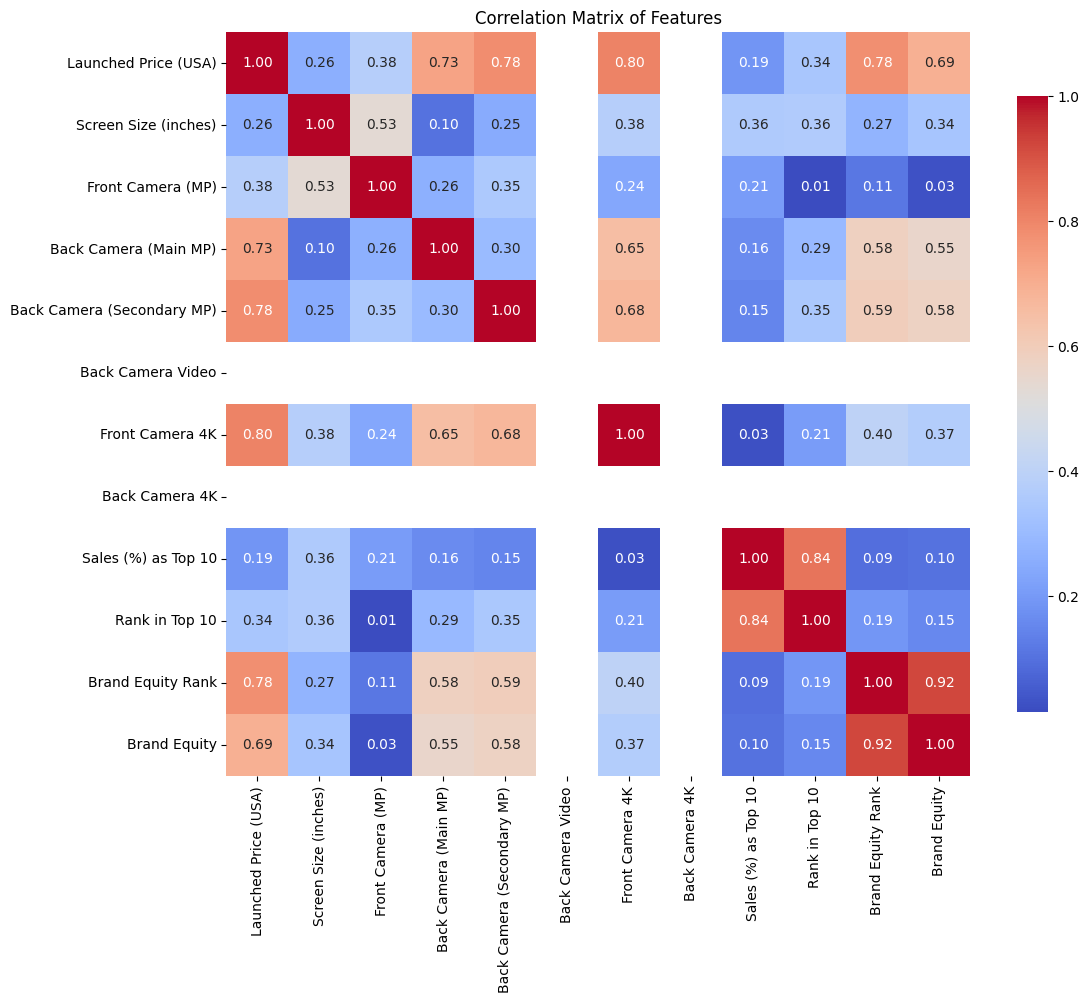

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df1[Z].corr().abs()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Features')


### Directly applying the methodology of BLP 

In [ ]:
df1.head(5)
df1.columns

Index(['Company Name', 'Model Name', 'Processor', 'Launched Price (USA)',
       'Year', 'Screen Size (inches)', 'Front Camera (MP)',
       'Back Camera (Main MP)', 'Back Camera (Secondary MP)',
       'Front Camera Video', 'Back Camera Video', 'Front Camera 4K',
       'Back Camera 4K', 'Sales (%) as Top 10', 'Rank in Top 10', 'Country',
       'Brand Equity Rank', 'Brand Equity', 'Credit Score',
       'shipments in millions', 'Average World GDP per Capita (USD)',
       'Inflation', 'GDP growth in %'],
      dtype='object')

In [ ]:
import re
import pandas as pd
import pyblp

# === Step 0: Work on a copy so we don’t overwrite your original df ===
df0 = df1.copy()


# === Step 2: Rename columns to the names pyblp expects ===
df0 = df0.rename(columns={
    'Year':                   'year',
    'Company Name':           'product_id',
    'Model Name':             'model_name',
            # percent
    'Launched Price (USA)':   'prices',         # object → numeric
    'Screen Size (inches)':   'screen_size',
    'Front Camera (MP)':      'front_cam_mp',
    'Front Camera 4K' : 'front_cam_4k', 
'Back Camera 4K' : 'back_cam_4k',
    'Back Camera (Main MP)':  'back_cam_main_mp',
    'Back Camera (Secondary MP)': 'back_cam_sec_mp',
    'Sales (%) as Top 10': 'shares',
    'Front Camera Video':     'front_video_flag',
    'Back Camera Video':      'back_video',
    'Rank in Top 10':         'rank_top10',
    'Brand Equity': 'brand_equity',
    'Brand Equity Rank': 'brand_equity_rank',
    'shipments in millions' : 'shipments_in_millions',
    'Average World GDP per Capita (USD)' : 'Average_World_GDP_per_Capita_USD',
    'GDP growth in %': 'GDP_growth_in_%'
})

# shares from percent → fraction, then clip into (0,1)
df0['shares'] = df0['shares'] / 100.0
df0['shares'] = df0['shares'].clip(1e-6, 1-1e-6)

# === Step 4: Build market & product identifiers ===
df0['market_ids']  = df0['year'].astype(str)
df0['product_ids'] = df0['product_id'] + " " + df0['model_name']

# === Step 5: Aggregate duplicates so each (market,product) appears once ===
# Take mean price, first share & specs
specs = ['prices','shares'] + [
    c for c in [
        'screen_size','front_cam_mp','back_cam_main_mp','back_cam_sec_mp',
        'brand_equity_rank', 


    ] if c in df0 
]

macro = (
    df0[['market_ids',
         'Average_World_GDP_per_Capita_USD',
         'Inflation',
         'GDP_growth_in_%',
         'shipments_in_millions', 'rank_top10']]
    .drop_duplicates('market_ids')
)
df_panel = (
    df0
    .groupby(['market_ids','product_ids'], as_index=False)
    [specs]
    .agg(lambda x: x.iloc[0] if x.name=='shares' else x.mean())
)

df_panel = df_panel.merge(macro, on='market_ids', how='left')



X1 = ['screen_size','front_cam_mp','back_cam_main_mp','back_cam_sec_mp',
        'brand_equity_rank', 'prices' ]


combined_data = df_panel[['prices','shares'] + X1].to_dict(orient='list')
combined_data['market_ids']  = df_panel['market_ids'].tolist()
combined_data['product_ids'] = df_panel['product_ids'].tolist()
combined_data['demand_instruments0'] = df_panel['Average_World_GDP_per_Capita_USD'].tolist()
combined_data['demand_instruments1'] = df_panel['Inflation'].tolist()
combined_data['demand_instruments2'] = df_panel['GDP_growth_in_%'].tolist()






u_formula_str = '0 + ' + ' + '.join(X1)

u_form = pyblp.Formulation(u_formula_str)
problem = pyblp.Problem(u_form, combined_data)
results = problem.solve()


print(results)


Initializing the problem ...
Initialized the problem after 00:00:00.

Dimensions:
 T    N    K1    MD 
---  ---  ----  ----
 3   12    6     8  

Formulations:
     Column Indices:             0            1               2                 3                 4            5   
--------------------------  -----------  ------------  ----------------  ---------------  -----------------  ------
X1: Linear Characteristics  screen_size  front_cam_mp  back_cam_main_mp  back_cam_sec_mp  brand_equity_rank  prices
Solving the problem ...
Updating the weighting matrix ...
Computed results after 00:00:00.

Problem Results Summary:
GMM     Objective    Clipped  Weighting Matrix
Step      Value      Shares   Condition Number
----  -------------  -------  ----------------
 1    +9.151551E-01     0      +3.329159E+10  

Estimating standard errors ...
Computed results after 00:00:00.

Problem Results Summary:
GMM     Objective    Clipped  Weighting Matrix  Covariance Matrix
Step      Value      Shares   

C:\Users\Lfran\AppData\Local\Temp\ipykernel_5992\4067753657.py:75: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  combined_data = df_panel[['prices','shares'] + X1].to_dict(orient='list')


### Retrieving demand based on the coefficients


In [ ]:
# 1) Solve the problem (you already have this)
results = problem.solve()

# 2) Extract the estimated β’s into a dict keyed by your X1 names
#    Make sure X1 is the same list you passed into Formulation
#    e.g. X1 = ['screen_size', ..., 'brand_equity_rank', 'prices']
betas = dict(zip(X1, results.beta))

# 3) Compute predicted shares and add to df_panel
df_panel['pred_share'] = results.compute_shares()

# 4) Compute own‐price elasticity for every product‐market
beta_price = betas['prices']
df_panel['own_elasticity'] = -beta_price * df_panel['prices'] * (1 - df_panel['pred_share'])

# 5) Filter for your target phone & market
#    Replace these strings with the exact product_ids and market_ids you want
mask = (
    (df_panel['product_ids'] == 'Samsung Galaxy S21') &
    (df_panel['market_ids'] == '2021')
)

print(df_panel.loc[mask, ['product_ids', 'market_ids', 'own_elasticity']])


Solving the problem ...
Updating the weighting matrix ...
Computed results after 00:00:00.

Problem Results Summary:
GMM     Objective    Clipped  Weighting Matrix
Step      Value      Shares   Condition Number
----  -------------  -------  ----------------
 1    +9.151551E-01     0      +3.329159E+10  

Estimating standard errors ...
Computed results after 00:00:00.

Problem Results Summary:
GMM     Objective    Clipped  Weighting Matrix  Covariance Matrix
Step      Value      Shares   Condition Number  Condition Number 
----  -------------  -------  ----------------  -----------------
 2    +1.590285E+00     0      +3.710311E+10      +1.110099E+09  

Cumulative Statistics:
Computation   Objective 
   Time      Evaluations
-----------  -----------
 00:00:00         2     

Beta Estimates (Robust SEs in Parentheses):
  screen_size     front_cam_mp    back_cam_main_mp  back_cam_sec_mp  brand_equity_rank      prices     
---------------  ---------------  ----------------  ---------------

In [ ]:
# 1. Peek at a sample of product_ids and market_ids
print(df_panel[['product_ids','market_ids']].head(20))

# 2. See all unique market_ids
print("Markets:", df_panel['market_ids'].unique())

# 3. See the first 20 product_ids
print("Products (first 20):", df_panel['product_ids'].unique()[:20])


                product_ids market_ids
0           Apple iPhone 13       2021
1   Apple iPhone 13 Pro Max       2021
2           Apple iPhone 14       2022
3       Apple iPhone 14 Pro       2022
4   Apple iPhone 14 Pro Max       2022
5      Apple iPhone SE 2022       2022
6        Samsung Galaxy A13       2022
7           Apple iPhone 15       2023
8       Apple iPhone 15 Pro       2023
9   Apple iPhone 15 Pro Max       2023
10    Samsung Galaxy A14 4G       2023
11    Samsung Galaxy A14 5G       2023
Markets: ['2021' '2022' '2023']
Products (first 20): ['Apple iPhone 13' 'Apple iPhone 13 Pro Max' 'Apple iPhone 14'
 'Apple iPhone 14 Pro' 'Apple iPhone 14 Pro Max' 'Apple iPhone SE 2022'
 'Samsung Galaxy A13' 'Apple iPhone 15' 'Apple iPhone 15 Pro'
 'Apple iPhone 15 Pro Max' 'Samsung Galaxy A14 4G' 'Samsung Galaxy A14 5G']


In [ ]:
mask = (
    df_panel['product_ids'].str.contains("Apple iPhone 13", case=False, regex=False)
) & (
    df_panel['market_ids'] == "2021"
)
print(df_panel.loc[mask, ['product_ids','market_ids','own_elasticity']])


               product_ids market_ids  own_elasticity
0          Apple iPhone 13       2021       -7.041170
1  Apple iPhone 13 Pro Max       2021       -9.730783


### Pricing power

In [ ]:
# Pricing power (Lerner index) = markup fraction = (P - MC) / P
df_panel['lerner_index'] = -1.0 / df_panel['own_elasticity']

# If you prefer markup in dollar terms and you have price:
#   (P - MC) = lerner_index * P
df_panel['markup_dollars'] = df_panel['lerner_index'] * df_panel['prices']

# For example, “Samsung Galaxy S21 Ultra” in market “2021”
mask = (
    df_panel['product_ids'].str.contains("Apple iPhone 13", case=False, regex=False)
) & (
    df_panel['market_ids'] == "2021"
)

print(df_panel.loc[mask, 
                   ['product_ids','market_ids','own_elasticity',
                    'lerner_index','markup_dollars']])

avg_price_iphone_13 = df0.loc[df0['model_name'] == "iPhone 13" , 'prices']

diff = avg_price_iphone_13 - 600  
print(f'{diff}' )

               product_ids market_ids  own_elasticity  lerner_index  \
0          Apple iPhone 13       2021       -7.041170      0.142022   
1  Apple iPhone 13 Pro Max       2021       -9.730783      0.102767   

   markup_dollars  
0      127.677640  
1      126.642766  
36    199.0
37    299.0
38    399.0
Name: prices, dtype: float64


In [ ]:
# 1. Filter to iPhone 13 rows
mask = df_panel['product_ids'].str.contains("iPhone 13", case=False, regex=False)
iphone13 = df_panel.loc[mask, ['product_ids', 'prices', 'markup_dollars']].copy()

# 2. Compute diff = price – markup_dollars
iphone13['diff'] = iphone13['prices'] - iphone13['markup_dollars']

# 3. Print each row and the overall average
print(iphone13[['product_ids', 'markup_dollars', 'diff']])

avg_diff = iphone13['diff'].mean()
print(f"\nAverage price minus markup for iPhone 13 variants: {avg_diff:.2f}")


               product_ids  markup_dollars         diff
0          Apple iPhone 13      127.677640   771.322360
1  Apple iPhone 13 Pro Max      126.642766  1105.690567

Average price minus markup for iPhone 13 variants: 938.51


In [ ]:
df_panel
blp_df = df_panel.copy()
blp_df.to_csv('blp_df.csv', index=False)
blp_df.columns.to_list()

['market_ids',
 'product_ids',
 'prices',
 'shares',
 'screen_size',
 'front_cam_mp',
 'back_cam_main_mp',
 'back_cam_sec_mp',
 'brand_equity_rank',
 'Average_World_GDP_per_Capita_USD',
 'Inflation',
 'GDP_growth_in_%',
 'shipments_in_millions',
 'rank_top10',
 'predicted_share',
 'pred_share',
 'own_elasticity',
 'lerner_index',
 'markup_dollars']